# Análise de dados do Airbnb - Lisboa (Portugal)

<center>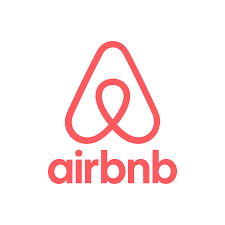</center>

**[Airbnb](https://https://www.airbnb.com.br/)** é um serviço online comunitário para as pessoas anunciarem, 
descobrirem e reservarem acomodações e meios de hospedagem. Foi fundado em Agosto de 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk em São Francisco, na Califórnia.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [**Inside Airbnb**](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Neste ***notebook*** iremos fazer uma análise exploratória dos dados referentes à cidade de **Lisboa** em Portugal.


## Instalação e importação de bibliotecas

In [1]:
# Instalação da biblioteca PIL para manipulação de imagem
!pip install pillow

In [2]:
# Importação de pacotes

# Manipulação e análise de dados
import pandas as pd
# Processamento de arrays
import numpy as np
# Plotagem de gráficos
import matplotlib.pyplot as plt
# Visualização de dados
import seaborn as sns
# Manipulação de imagens
from PIL import Image
# Visualização de mapas
import plotly.express as px

# Para que saídas e plotagens sejam exibidas no notebook
%matplotlib inline

## Importação dos dados

Os dados usados neste *notebook* foram obtidos a partir do site [**Inside Airbnb**](http://insideairbnb.com/get-the-data.html).

Foi escolhido o seguinte arquivo referente à cidadede de Lisboa:

[**listings.csv**](http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/visualisations/listings.csv) - *Summary information and metrics for listings in Lisboa (good for visualisations)*.

In [4]:
# Importação de dados
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-10-15/visualisations/listings.csv")


## Conhecendo o *dataset*
Vamos visualizar o *dataset* para conhecer o seu tamanho e variáveis.

In [5]:
# Verificando estrutura de dados - 3 primeiros registros
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,30,2021-09-18,0.35,1,161,4,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,2,122,2019-11-08,1.35,1,296,9,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,54,3,333,2019-10-29,2.73,1,170,10,23535/AL


In [7]:
# Verificação do tamanho do dataframe
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))


Número de linhas: 18761
Número de colunas: 18


In [8]:
# Conhecendo as colunas
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [9]:
# Verificando tipos dos dados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

**Legenda - Nomes das colunas**:

* **id** = número de identificação do imóvel
* **name** = nome (descritivo) da propriedade anunciada
* **host_id** = número de identificação do proprietário do imóvel
* **host_name** = Nome do anfitrião
* **neighbourhood_group** = nome do concelho*
* **neighbourhood** = nome do freguesia*
* **latitude** = coordenada da latitude da propriedade
* **longitude** = coordenada da longitude da propriedade
* **room_type** = informa o tipo de hospedagem 
* **price** = preço da diária do imóvel em Dólares Americanos ($USD)
* **minimum_nights** = quantidade mínima de noites para reservar
* **number_of_reviews** = número de *reviews* que a propriedade possui
* **last_review** = data do último *review*
* **reviews_per_month** = quantidade de *reviews* por mês
* **calculated_host_listings_count** = quantidade de imóveis pertencentes ao mesmo anfitrião
* **availability_365** = número de dias de disponibilidade dentro de 365 dias
* **number_of_reviews_ltm** = número de *reviews* no último mês
* **license** = licensa

 *Em Portugal, a divisão administrativa se dá em Distritos, Concelhos e Freguesias, sendo este o de menor abrangência e o primeiro o de maior abrangência territorial. A freguesia por sua vez é um conjunto de bairros.


## Com quais dados iremos trabalhar?

O conjunto de dados importados é referente ao distrito de Lisboa, área muito ampla e com grande diferença do número de imóveis cadastrados, por isso, neste *notebook*, trabalharemos mais especificamente com os dados do concelho de **Lisboa** (que é parte do distrito de mesmo nome).

Para referência geográfica, abaixo está o mapa do concelho de Lisboa e sua divisão em freguesias.
    
---

<center><img alt="Analisando Airbnb" width="70%" src="https://www.am-lisboa.pt/imgs/imagens/1518807996S2fVZ8eq9Xt47YS8.png"></center>

---

Neste ponto, será feito uma filtragem nos dados de interesse.



In [10]:
# Verificando o nome e a quantidade de concelhos
df.neighbourhood_group.unique()
print('Número de Concelhos: {}'.format(df.neighbourhood_group.unique().shape[0]))

Número de Concelhos: 16


In [13]:
# Verificando as freguesias pertencentes ao concelho de Lisboa 
print(df.neighbourhood[df.neighbourhood_group == 'Lisboa'].unique())
print('\nQuantidade de Freguesias: {}'.format(df.neighbourhood\
                                            [df.neighbourhood_group == 'Lisboa'].unique().shape[0]))

['Belm' 'Santa Maria Maior' 'Estrela' 'Avenidas Novas' 'Lumiar'
 'Misericrdia' 'So Vicente' 'Santo Antnio' 'So Domingos de Benfica'
 'Penha de Frana' 'Arroios' 'Alcntara' 'Alvalade' 'Parque das Naes'
 'Areeiro' 'Campolide' 'Ajuda' 'Benfica' 'Olivais' 'Campo de Ourique'
 'Marvila' 'Beato' 'Carnide' 'Santa Clara']

Quantidade de Freguesias: 24


Portanto, o **concelho** de Lisboa possui 24 freguesias.

Para sanar algumas dúvidas, lista com o significado das abreviações:

*   Alcntara -> Alcântara
*   Belm -> Belém
*   Misericrdia -> Misericórdia
*   Parque das Naes -> Parque das Nações
*   Penha de Frana -> Penha de França
*   Santo Antnio -> Santo Antônio
*   So Domingos de Benfica -> São Domingos de Benfica
*   So Vicente -> São Vicente

## Novo *datraframe* - Concelho de Lisboa

Criação de novo *dataframe* contendo apenas dados referentes ao Concelho de Lisboa.

In [15]:
# Criação do dataframe
df_lisboa = df[df.neighbourhood_group == 'Lisboa']

In [18]:
# Verificação
df_lisboa.head(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,30,2021-09-18,0.35,1,161,4,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,2,122,2019-11-08,1.35,1,296,9,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,54,3,333,2019-10-29,2.73,1,170,10,23535/AL


In [19]:
# Verificando quantidade de entradas
print("Número de linhas: {}".format(df_lisboa.shape[0]))
print("Número de colunas: {}".format(df_lisboa.shape[1]))

Número de linhas: 13114
Número de colunas: 18


Do total inicial de 18761 registros, trabalharemos com 13114.

## Dados faltantes
Verificação de dados faltantes

In [20]:
# Quantidade de dados faltantes
df_lisboa.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            3
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1758
reviews_per_month                 1758
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1079
dtype: int64

In [21]:
# Percentual de dados faltantes em ordem decrescente
percentual_faltante = (df_lisboa.isnull().sum() / df_lisboa.shape[0]).sort_values(ascending=False)
index = list(percentual_faltante.index)
n = 0
for n in range(len(percentual_faltante)):
    print('{} | {:.2%}'.format(index[n].ljust(30), percentual_faltante[n]))
    n += 1
    print('-'*39)

reviews_per_month              | 13.41%
---------------------------------------
last_review                    | 13.41%
---------------------------------------
license                        | 8.23%
---------------------------------------
name                           | 0.06%
---------------------------------------
host_name                      | 0.02%
---------------------------------------
minimum_nights                 | 0.00%
---------------------------------------
number_of_reviews_ltm          | 0.00%
---------------------------------------
availability_365               | 0.00%
---------------------------------------
calculated_host_listings_count | 0.00%
---------------------------------------
number_of_reviews              | 0.00%
---------------------------------------
id                             | 0.00%
---------------------------------------
room_type                      | 0.00%
---------------------------------------
longitude                      | 0.00%
-----------

Para este estudo, foi considerado importante os campos *price*, *latitude* e *longitude*, portanto, não há necessidade de exclusão de linhas.

In [22]:
# Verificando a primeira linha
print(df_lisboa.iloc[0])
  

id                                                                6499
name                              Belém 1 Bedroom Historical Apartment
host_id                                                          14455
host_name                                                        Bruno
neighbourhood_group                                             Lisboa
neighbourhood                                                     Belm
latitude                                                       38.6975
longitude                                                     -9.19768
room_type                                              Entire home/apt
price                                                               40
minimum_nights                                                       3
number_of_reviews                                                   30
last_review                                                 2021-09-18
reviews_per_month                                                 0.35
calcul

## Estudo estatístico simplificado
Foram escolhidas algumas colunas com dados numéricos para um estudo inicial.

### Verificação de erro no tipo de dado

Para a coluna ***price*** presisamos converter para uma variável tipo *float*.

In [27]:
# Resumo estatístico
df_lisboa[['latitude','longitude','price','minimum_nights']].describe()

,latitude,longitude,price,minimum_nights
count,13114.000000,13114.000000,13114.00000,13114.000000
mean,38.720469,-9.142925,98.23616,3.856566
std,0.014885,0.017789,198.07530,13.335035
min,38.691930,-9.226790,0.00000,1.000000
25%,38.711240,-9.149648,50.00000,1.000000
50%,38.715510,-9.140725,71.00000,2.000000
75%,38.725710,-9.132713,105.00000,3.000000
max,38.792960,-9.092080,11499.00000,365.000000


Alguns pontos para se observar nesta descrição:

*   A média de preço muito inferior ao desvio padrão, e grande diferença entre o percentil 75 e o valor máximo, o que indica que *outliers* estão bem acima da média;
*   Média do número mínimo de noites para aluguel muito acima do esperado para este ramo de negócio;

### Histogramas
Vamos verificar gráficos tipo histograma para entender alguns dados.

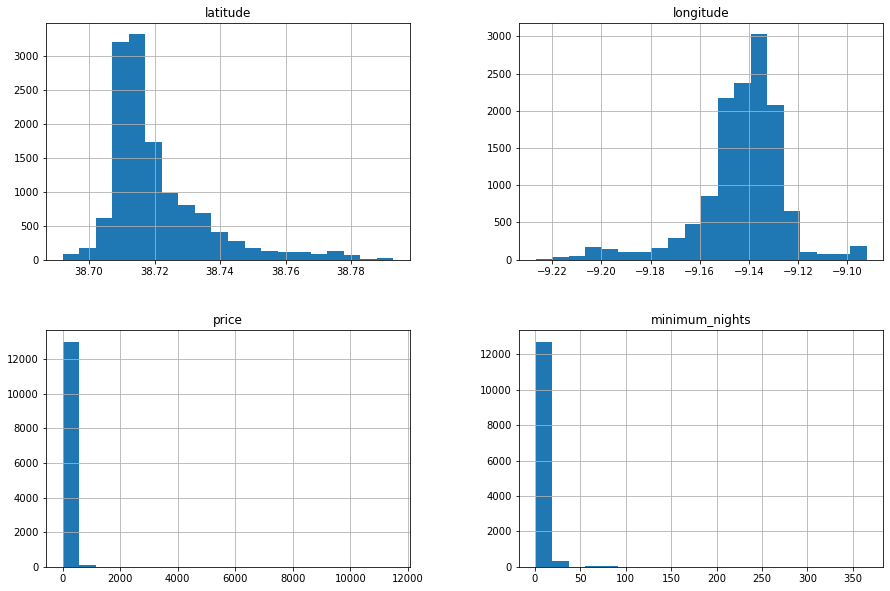

In [31]:
# Histograma das variáveis numéricas
df_lisboa[['latitude','longitude','price','minimum_nights']].hist(bins=20, figsize=(15,10));

Chama a  atenção a forma de alguns histogramas acima, como os referente a mínimo de noites e preço. Faremos uma verificação de valores *outliers* e filtragem dos mesmos.

### Verificação de outliers


#### Definição de funções para construção de gráfico *boxplot*.

Obs.: Para facilitar a visualização, os gráficos mostram até valores 5 vezes maior que a média.

In [34]:
def boxplot_inicial(coluna):
    plt.figure(figsize=(20, 2))
    plt.boxplot(coluna,vert=False)
    plt.xlim(0, coluna.mean()*5);

    # Cálculo boxplot
    Q3 = coluna.quantile(.75)
    Q1 = coluna.quantile(.25)
    dist_inter = Q3 - Q1
    lim_sup = Q3+(Q3 - Q1)*1.5

    print(f'Terceiro quartil: {Q3}')
    print(f'Primeiro quartil: {Q1}')
    print(f'Distância interquartílica: {dist_inter}')
    print(f'Outliers acima de: {lim_sup:.2f}\n')

    # Verificar quantidade de valores outliers
    n_out = len(df_lisboa[coluna > lim_sup])
    percent_out = n_out / df_lisboa.shape[0]
    print(f'Valores acima de {lim_sup}: {n_out} entradas')
    print(f'Corresponde a {percent_out:.2%} do total de entradas')
    

Terceiro quartil: 105.0
Primeiro quartil: 50.0
Distância interquartílica: 55.0
Outliers acima de: 187.50

Valores acima de 187.5: 926 entradas
Corresponde a 7.06% do total de entradas


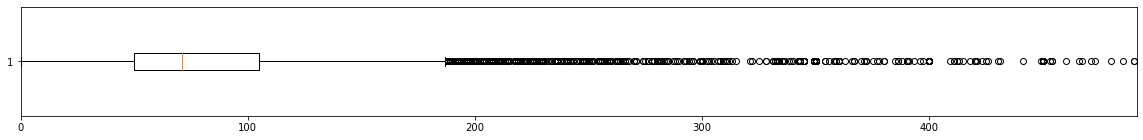

In [35]:
# Price
boxplot_inicial(df_lisboa.price)

Terceiro quartil: 3.0
Primeiro quartil: 1.0
Distância interquartílica: 2.0
Outliers acima de: 6.00

Valores acima de 6.0: 777 entradas
Corresponde a 5.92% do total de entradas


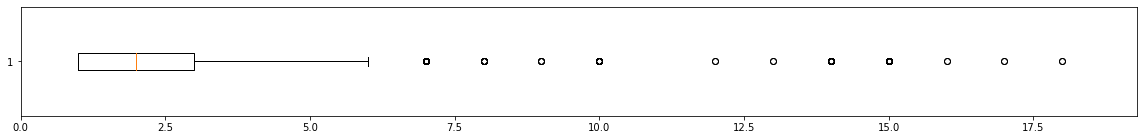

In [36]:
# Minimum_nights
boxplot_inicial(df_lisboa.minimum_nights)

## Remover outliers

#### Definição de função para remover *outliers*:

In [41]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df_lisboa, nome_coluna):
    qtde_linhas = df_lisboa.shape[0]
    lim_inf, lim_sup = limites(df_lisboa[nome_coluna])
    df_lisboa = df_lisboa.loc[(df[nome_coluna] >= lim_inf) & (df_lisboa[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df_lisboa.shape[0]
    return df_lisboa,  linhas_removidas

### Remoção de *outliers*

In [42]:
# Shape do dataframe
df_lisboa.shape

(13114, 18)

In [43]:
# Price
df_lisboa, linhas_removidas = excluir_outliers(df_lisboa, 'price')
print('{} linhas removidas'.format(linhas_removidas))

926 linhas removidas


In [44]:
# Minimum_nights
df_lisboa, linhas_removidas = excluir_outliers(df_lisboa, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

738 linhas removidas


In [46]:
# Conferir tamanho df_lisboa
df_lisboa.shape

(11450, 18)

Portanto, neste ponto foram excluídos 1664 registros, ficando o *dataframe* **df_lisboa** com 11450 registros.

Agora verificaremos os **histogramas** sem *outliers*:

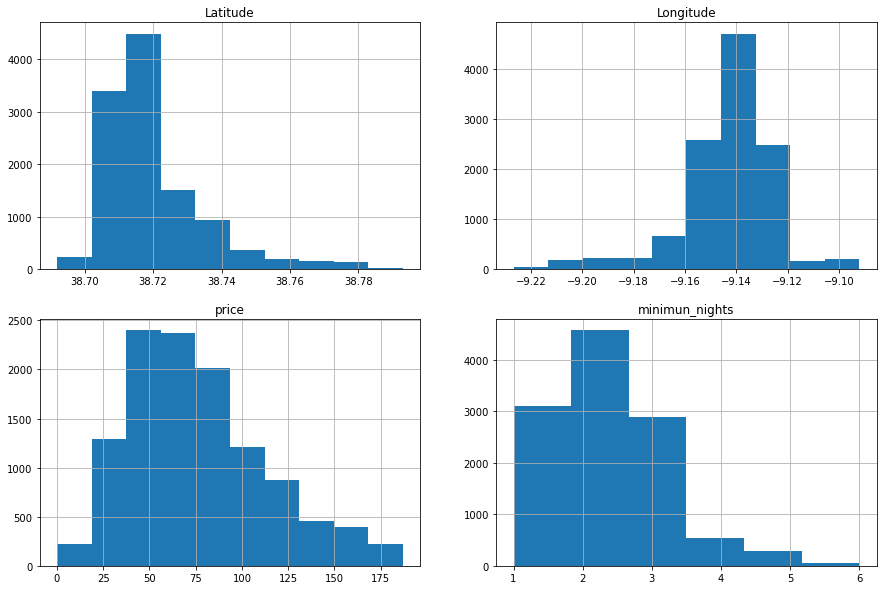

In [101]:
# Plotar histogramas

fig = plt.figure(figsize=(15, 10))

# Gráfico 1
fig.add_subplot(221)
plt.grid()
plt.title('Latitude')
plt.hist(df_lisboa.latitude);

# Gráfico 2
fig.add_subplot(222)
plt.grid()
plt.title('Longitude')
plt.hist(df_lisboa.longitude);

# Gráfico 3
fig.add_subplot(223)
plt.grid()
plt.title('price')
plt.hist(df_lisboa.price);

# Gráfico 4
fig.add_subplot(224)
plt.grid()
plt.title('minimun_nights')
plt.hist(df_lisboa.minimum_nights, bins=6);

### Tipos de imóveis
Agora faremos uma verifição sobre  os tipos de acomodações no Airbnb.

In [56]:
# Quantidade por tipo de acomodação
for tipo in range (0, len(df_lisboa.room_type.unique())):
    print('{} | {}'.format(df_lisboa.room_type.value_counts().index[tipo].ljust(15),df_lisboa.room_type.value_counts()[tipo]))
    print('-'*22)

Entire home/apt | 8886
----------------------
Private room    | 2213
----------------------
Hotel room      | 197
----------------------
Shared room     | 154
----------------------


TIPOS DE ACOMODAÇÃO:

* **Entire home/apt**   -> Lugares inteiros (todo o imóvel).

* **Private room**      -> Quarto privado.

* **Hotel room**        -> Oferecem o nível de serviço e a hospitalidade associados aos hotéis tradicionais.

* **Shared room**       ->  Quarto compartilhado.

In [57]:
# Percentual por tipo de imóvel
n = 0
for n in range (0, len(df_lisboa.room_type.unique())):
    print('{} | {:.2%}'.format(df_lisboa.room_type.value_counts().index[n].ljust(15),
                              df_lisboa.room_type.value_counts(1)[n]))
    print('-'*25)

Entire home/apt | 77.61%
-------------------------
Private room    | 19.33%
-------------------------
Hotel room      | 1.72%
-------------------------
Shared room     | 1.34%
-------------------------


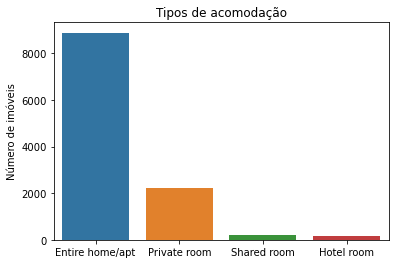

In [58]:
# Plotagem do gráfico: Tipos de acomodação
tipos=sns.barplot(x=df_lisboa.room_type.unique(), y=df_lisboa.room_type.value_counts(), data=df)
tipos.set_title('Tipos de acomodação')
tipos.set_ylabel('Número de imóveis');

### Quantidade de imóveis por freguesia

In [70]:
# Quantidade absoluta
for n in range (0, len(df_lisboa.neighbourhood.unique())):
    print('{}| {}'.format(df_lisboa.neighbourhood.value_counts().index[n].ljust(23),
                          df_lisboa.neighbourhood.value_counts()[n]))
    print('-'*29)
print('\nMédia de imóveis por freguesia: {:.0f}'.format(df_lisboa.neighbourhood.value_counts().mean()))

Santa Maria Maior      | 2731
-----------------------------
Misericrdia            | 1996
-----------------------------
Arroios                | 1437
-----------------------------
So Vicente             | 947
-----------------------------
Santo Antnio           | 866
-----------------------------
Estrela                | 660
-----------------------------
Avenidas Novas         | 476
-----------------------------
Penha de Frana         | 376
-----------------------------
Areeiro                | 238
-----------------------------
Belm                   | 226
-----------------------------
Campo de Ourique       | 207
-----------------------------
Alcntara               | 201
-----------------------------
Parque das Naes        | 176
-----------------------------
Olivais                | 142
-----------------------------
Campolide              | 138
-----------------------------
Alvalade               | 132
-----------------------------
Ajuda                  | 118
------------------------

In [67]:
# Percentual de imóveis por freguesia
for n in range (0, len(df_lisboa.neighbourhood.unique())):
    print(('{} | {:.2%}'.format(df_lisboa.neighbourhood.value_counts().index[n].ljust(23),
                                  df_lisboa.neighbourhood.value_counts(1)[n])))
    print('-'*32)

Santa Maria Maior       | 23.85%
--------------------------------
Misericrdia             | 17.43%
--------------------------------
Arroios                 | 12.55%
--------------------------------
So Vicente              | 8.27%
--------------------------------
Santo Antnio            | 7.56%
--------------------------------
Estrela                 | 5.76%
--------------------------------
Avenidas Novas          | 4.16%
--------------------------------
Penha de Frana          | 3.28%
--------------------------------
Areeiro                 | 2.08%
--------------------------------
Belm                    | 1.97%
--------------------------------
Campo de Ourique        | 1.81%
--------------------------------
Alcntara                | 1.76%
--------------------------------
Parque das Naes         | 1.54%
--------------------------------
Olivais                 | 1.24%
--------------------------------
Campolide               | 1.21%
--------------------------------
Alvalade              

### Freguesias mais caras


In [75]:
# Valor médio das 5 freguesias mais caras

mais = df_lisboa.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

for n in range(5):
    print('{} | $USD {:.2f}'.format(mais.index[n].ljust(18), mais[n]))
    print('-'*31)


Parque das Naes    | $USD 98.83
-------------------------------
Santa Maria Maior  | $USD 84.07
-------------------------------
Santo Antnio       | $USD 82.68
-------------------------------
Misericrdia        | $USD 82.19
-------------------------------
Campo de Ourique   | $USD 79.69
-------------------------------


### Freguesias mais baratas

In [77]:
# Valor médio das 5 freguesias mais baratas

menos = df_lisboa.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-5:]

for n in range(5):
    print('{} | $USD {:.2f}'.format(menos.index[n].ljust(18), menos[n]))
    print('-'*31)

Benfica            | $USD 59.05
-------------------------------
Areeiro            | $USD 58.71
-------------------------------
Alvalade           | $USD 57.95
-------------------------------
Beato              | $USD 54.76
-------------------------------
Santa Clara        | $USD 40.58
-------------------------------


### Localização
Finalizando este estudo, plotamos 2 gráficos com a geolocalização dos imóveis.

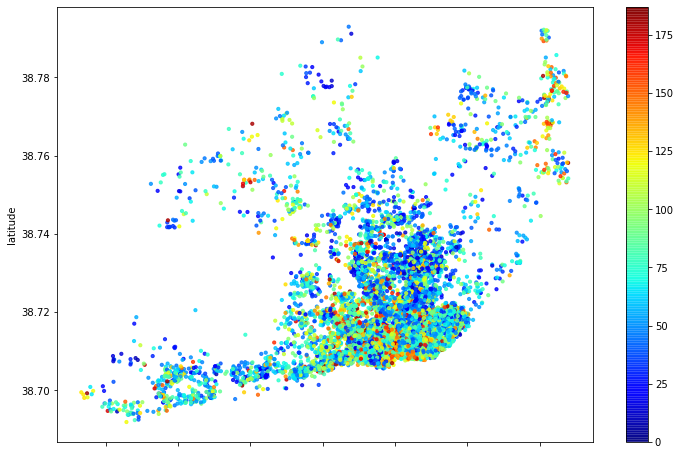

In [99]:
# Plotar por latitude / longitude
df_lisboa.plot(kind='scatter', x='longitude', y='latitude',\
               alpha=0.8, c=df_lisboa['price'], s=10, cmap=plt.get_cmap('jet'), figsize=(12,8));    

In [98]:
# Mapa de calor - Preços das diárias
centro_mapa = {'lat': df_lisboa.latitude.mean()+.02, 'lon': df_lisboa.longitude.mean() }
fig = px.density_mapbox(df_lisboa, lat='latitude', lon='longitude', z='price', radius=2,
                        center = centro_mapa, zoom=10.7, mapbox_style='carto-positron', width=750, height=500)
fig.show()

## Conclusão

Este *dataset* disponibilizado pelo **Airbnb** é rico em informações sobre acomodações no **Distrito de Lisboa**. Neste trabalho, concentramos-nos em uma análise exploratória das principais variáveis. Inicialmente exploramos o sifnificado de cada coluna e seus valores e resolvemos filtrar nossos dados apenas para o **Concelho de Lisboa**. Fizemos umas verificação sobre dados faltantes, o que mostrou que os dados numéricos estavam todos preenchidos. Em seguida, fizemos uma busca por *outliers* e posteriormente sua retirada do *dataframe*. Isso tornou nossa análise menos suceptível à "ruídos" causados por imóveis com valores muito acima da mediana dos dados. Também analisamos brevemente o quantitativo dos tipos de acomodações disponíveis, as freguesias com maior e menor custo por noite e finalmente fizemos a plotagem de gráficos baseados nos dados de geolocalização de cada imóvel.

Isso nos deu uma visão abrangente sobre a atuação do **Airbnb** na cidade de **Lisboa**, e um conhecimento valioso sobre os dados disponibilizados pela empresa. Trabalhos futuros podem incluir um estudo sobre os *reviews*, cruzando dados com os *hosts* habituais da plataforma, comparação com outros centros urbanos, busca de correlações matemáticas entre as variáveis e, para as cidades com grande apelo turístico (como é o caso do nosso *dataframe*), um estudo baseado na proximidade com locais de interesse.

Sugestões, correções e dicas são sempre bem vindas.